## DBSCAN


First, we import the required libraries. 

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [97]:
# Load the data
df = pd.read_csv("Datasets/marketing_campaign.csv")


df = pd.read_csv("Datasets/marketing_campaign.csv", sep='\t')

# Drop rows with missing income values
df = df.dropna()

# Make a new feature 
df["Age"] = 2025 - df["Year_Birth"]

features = [
    "Income", "Age", "Kidhome", "Teenhome",
    "Recency", "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth"
]

X = df[features]



In [98]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=1.8, min_samples=5)
labels = db.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["Cluster"] = labels



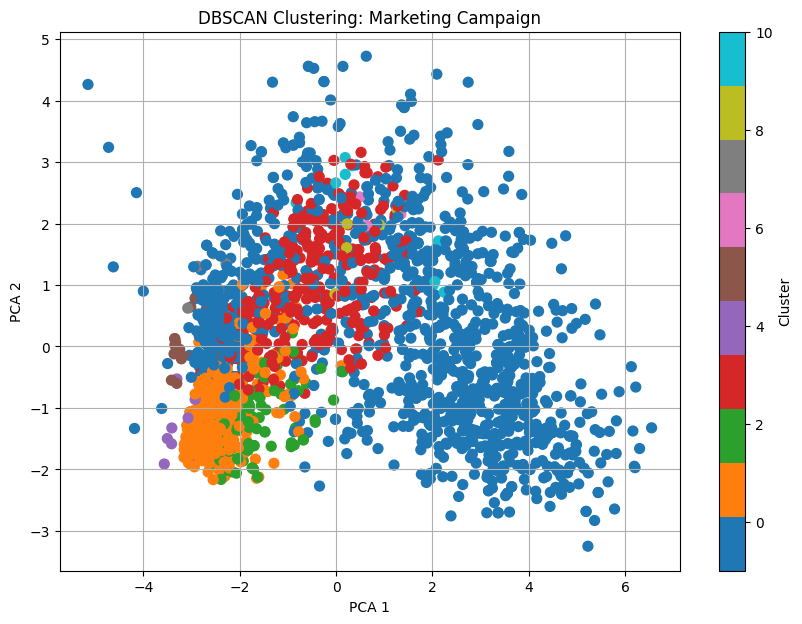

In [99]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering: Marketing Campaign")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

In [100]:
df.groupby("Cluster")[features].mean()


,Income,Age,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,,,,
-1,69488.541580,57.778586,0.148649,0.433472,49.454262,555.488565,52.635135,336.698545,75.355509,54.344075,74.867983,2.281705,5.574844,4.979210,8.066528,4.089397
0,41281.704615,59.387692,1.000000,1.000000,48.864615,79.249231,3.713846,28.876923,5.298462,3.680000,16.916923,3.286154,2.587692,0.738462,3.618462,6.313846
1,30160.415525,46.472603,1.000000,0.000000,48.712329,35.388128,5.283105,25.849315,7.502283,5.500000,15.431507,2.009132,2.305936,0.470320,3.118721,6.942922
2,28020.270270,53.954955,0.000000,0.000000,49.000000,36.873874,8.576577,22.891892,10.351351,7.675676,16.963964,1.117117,1.918919,0.585586,3.414414,6.054054
3,51430.909091,61.526646,0.000000,1.000000,47.711599,248.310345,9.278997,60.554859,12.545455,8.818182,31.388715,2.354232,4.520376,1.673981,5.890282,5.319749
4,31118.000000,49.916667,2.000000,0.000000,44.250000,18.583333,2.416667,18.166667,7.416667,3.000000,12.750000,1.583333,1.916667,0.500000,2.583333,6.833333
5,38788.909091,61.045455,2.000000,1.000000,49.136364,24.545455,0.681818,10.000000,2.000000,1.318182,7.090909,1.772727,1.409091,0.181818,2.818182,6.272727
6,65855.400000,64.600000,0.000000,1.000000,50.000000,979.400000,13.000000,131.800000,11.600000,6.400000,25.000000,2.800000,8.800000,3.400000,4.800000,5.800000
7,39130.600000,61.200000,1.000000,2.000000,68.400000,19.200000,2.000000,16.000000,4.400000,8.200000,6.400000,1.800000,1.200000,0.000000,3.200000,7.200000


The values we're seeing (like Income, Age, Recency, etc.) in the above output are the average (mean) values of each feature across all customers in each cluster.

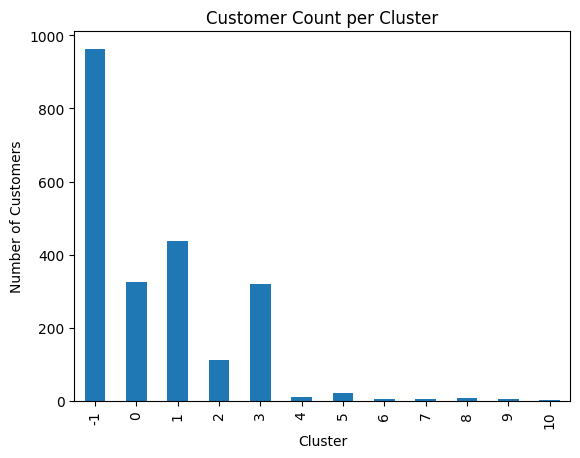

In [101]:
df['Cluster'].value_counts().sort_index()
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Count per Cluster")
plt.show()



Above we can see the number of customers assigned to each DBSCAN cluster (including -1 for noise).
Some clusters are large and well-formed (like Clusters 0,1,3). Others are very small (Clusters 4–10), possibly indicating less stable or outlier segments.


---
We can do brief error analysis. 

Silhouette Score measures how well each point fits within its assigned cluster versus other clusters. It ranges from -1 (poor) to 1 (well-clustered). For DBSCAN, it's found only on non-noise points and helps evaluate cluster separation.

The formula for the silhouette score of a point *i* is:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

Where:
- \( a(i) \): average distance from point *i* to other points in the **same cluster**
- \( b(i) \): average distance from point *i* to points in the **nearest other cluster**

In [102]:
from sklearn.metrics import silhouette_score

mask = df["Cluster"] != -1
if mask.sum() > 1:
    score = silhouette_score(X_scaled[mask], df["Cluster"][mask])
    print(f"Silhouette Score (no noise): {score:.3f}")


Silhouette Score (no noise): 0.127


In [103]:
noise_ratio = df['Cluster'].value_counts(normalize=True).loc[-1]
print(f"Noise percentage: {noise_ratio:.2%}")


Noise percentage: 43.41%


To evaluate the quality of the DBSCAN clustering, I computed the silhouette score, which measures how well each point fits within its assigned cluster relative to other clusters. 
The resulting silhouette score was 0.127. This suggests that while DBSCAN identified some groupings in the data, the boundaries between clusters are not strongly defined, and many data points lie near the edge of clusters.

### Impact of testing different ```eps``` values
Eps value of 3 simply created two clusters, one of them being noise, achieving noise percentage of ~50%. So setting eps to a larger number causes too general clusters. 
I found that a eps = 0.5 resulted in very few clusters (only 3) and extremely high noise (98.96%), meaning DBSCAN failed to group most customers due to overly strict neighborhood constraints. Increasing eps to 1.5 significantly improved cluster coverage, producing 9 clusters and reducing noise to ~50%. 
With my final setting of ```eps``` = 1.8, I achieved a noise Percentage of 43.41%, meaning 56.59% of data points were successfully clustered. That’s a major improvement from earlier runs where ~85–99% were labeled as noise, so I decided that eps = 1.8 was a more inclusive value as it had more data grouped into clusters.


This highlights the sensitivity of DBSCAN to the ```eps``` parameter, and the need to balance tight cluster boundaries with sufficient inclusion of meaningful data points.
